# Lerncamp 2021
## Roboter-Lokalisierung
### Westsächsische Hochschule Zwickau, Informatik

----

# Ziel: Lokalisierung bei ungenauer Farbbestimmung und Roboterbewegung

Nachdem wir die Roboterlokalisierung erfolgreich umgesetzt haben, schauen wir uns nun an, wie man Mess- und Bewegungsungenauigkeiten im Programm beachten kann...

In [1]:
# Setup (bitte ignorieren)
%matplotlib inline

from helper import *

## 1. Schritt: Aktualisierung der Position kann mit Sensorrauschen umgehen

Der Farbsensor misst nicht immer akkurat (d.h., zu 100 Prozent genau). Wir müssen in unser Programm einbeziehen, dass der Sensor die Farbe nur in 90% der Messungen korrekt erkennt. Im 10% der Fälle erkennt er eine weiße Zelle als schwarze und eine schwarze Zelle als weiße.


In [2]:
def aktualisiere_positionsvermutung_ungenau(karte, vermutungen, gemessene_farbe):
	# 1. Neue Vermutungen anhand der alten und der gemessenen Zellfarbe berechnen
	
    # Wahrscheinlichkeiten, dass Sensor korrekt/falsch gemessen hat
	p_korrekte_farbe = 0.9
	p_falsche_farbe = 1 - p_korrekte_farbe 

	neue_vermutungen = []
	for index, zellfarbe in enumerate(karte):
		vermutung = vermutungen[index]
		gleiche_farbe = (zellfarbe == gemessene_farbe)
		if gleiche_farbe:
			neue_vermutung = vermutung * p_korrekte_farbe
		else:
			neue_vermutung = vermutung * p_falsche_farbe
		neue_vermutungen.append(neue_vermutung)

	# 2. Normalisieren
	s = sum(neue_vermutungen)
	for i in range(len(neue_vermutungen)):
		neue_vermutungen[i] = neue_vermutungen[i] / s
	
	return neue_vermutungen

----

## 1. Übung

* Verwenden Sie die neue Prozedur `aktualisiere_positionsvermutung_ungenau` für die Aktualisierung der Position.
* Verwenden Sie nun `ausgabe_grafisch` statt `ausgabe`.
* Verwenden Sie die bekannte `bewege_eins_nach_rechts` für das Bewegen des Roboters zur nächsten Zelle.

In [3]:
def bewege_eins_nach_rechts(vermutungen):
    return shift_list(vermutungen, 1)

Ausgangssituation:


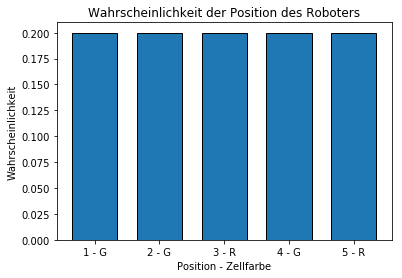

In [4]:
karte = ['G', 'G', 'R', 'G', 'R']
vermutungen = [ 0.2, 0.2, 0.2, 0.2, 0.2 ]

print("Ausgangssituation:")
ausgabe_grafisch(karte, vermutungen)

1. Messung: Zelle hat Farbe G


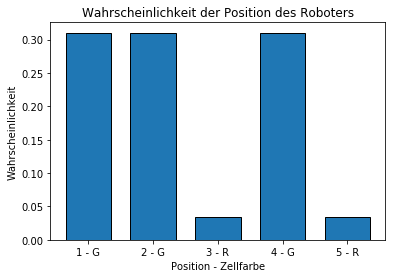

In [5]:
print("1. Messung: Zelle hat Farbe G")
vermutungen = aktualisiere_positionsvermutung_ungenau(karte, vermutungen, 
                                                             gemessene_farbe='G')
ausgabe_grafisch(karte, vermutungen)

1. Bewegung: 1 Zelle nach rechts


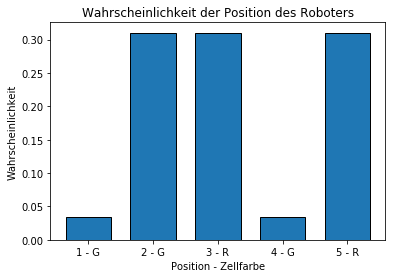

In [6]:
print("1. Bewegung: 1 Zelle nach rechts")
vermutungen = bewege_eins_nach_rechts(vermutungen)
ausgabe_grafisch(karte, vermutungen)

In [7]:
print("2. Messung: Zelle hat Farbe G")
# TODO

2. Messung: Zelle hat Farbe G


In [8]:
print("2. Bewegung: 1 Zelle nach rechts")
# TODO

2. Bewegung: 1 Zelle nach rechts


In [9]:
print("3. Messung: Zelle hat Farbe R")
# TODO

3. Messung: Zelle hat Farbe R


----

## 2. Übung

Was passiert, wenn Sie nur Messen, ohne den Roboter zu bewegen?

----
----

## 2. Schritt: Bewegen des Roboters kann mit Ungenauigkeiten umgehen

Wie Wahrscheinlichkeit, dass Roboter bei einem Schritt nach rechts oder links
* exakt in der Nachbarzelle landet, beträgt 90 Prozent (korrekte Bewegung),
* in der aktuellen Zelle verbleibt, beträgt 5 Prozent (ungenaue Bewegung, Undershooting) oder
* sich eine Zelle zu weit bewegt, beträgt ebenfalls 5 Prozent (ungenaue Bewegung, Overshooting).

Hier nun die aktualisierte (und generalisierte) Bewegen-Prozedur. Mit Hilfe des Parameters `schritte` kann die Anzahl und Richtung der Schritte, die sich der Roboter nach rechts oder links bewegen soll, angegeben werden. Ein positiver Wert bewegt den Roboter um den Betrag der Schritte nach rechts, ein negativer bewegt ihn nach links.

In [10]:
def bewege_ungenau(vermutungen, schritte):
    p_overshoot = 0.05
    p_undershoot = 0.05
    p_exakt = 1 - p_overshoot - p_undershoot
    neue_vermutungen = []
    
    anzahl_vermutungen = len(vermutungen)
    for i in range(anzahl_vermutungen):
        index = (i-schritte) % anzahl_vermutungen
        next_index = (index+1) % anzahl_vermutungen
        prev_index = (index-1) % anzahl_vermutungen
        neue_vermutung = p_exakt * vermutungen[index]
        neue_vermutung = neue_vermutung + p_overshoot  * vermutungen[next_index]
        neue_vermutung = neue_vermutung + p_undershoot * vermutungen[prev_index]
        neue_vermutungen.append(neue_vermutung)
    
    return neue_vermutungen

----

## 3. Übung: Ungenaues Bewegen verwenden

Verwenden Sie nun die Prozedur `bewege_ungenau` wie folgt:

    print("X. Bewegung: 1 Zelle nach link")
    vermutungen = bewege_ungenau(vermutungen, -1)
    ausgabe_grafisch(karte, vermutungen)

Ausgangssituation:


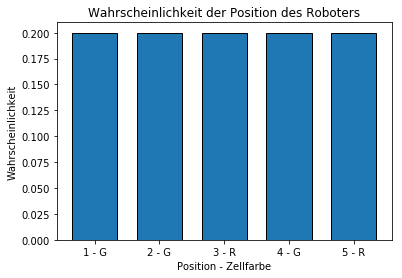

In [12]:
karte = ['G', 'G', 'R', 'G', 'R']
vermutungen = [1/len(karte)] * len(karte)

print("Ausgangssituation:")
ausgabe_grafisch(karte, vermutungen)

In [ ]:
print("1. Messung: Zelle hat Farbe TODO")
# TODO

In [ ]:
print("1. Bewegung: 1 Zelle nach TODO")
# TODO

In [ ]:
print("x. Messung: Zelle hat Farbe TODO")
# TODO

In [13]:
print("x. Bewegung: 1 Zelle nach TODO")
# TODO

x. Bewegung: 1 Zelle nach TODO


In [ ]:
----

## 4. Übung: Nur Bewegen, kein Messen der Frabe

1. Lokalisieren Sie den Roboter hinreichend gut
2. Was passiert, wenn Sie den Roboter nun nur mehrfach bewegen, ohne die Farbe der Zellen zu bestimmen? Warum?

----
----